In [7]:
!pip install pyarrow

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_parquet("part-00000-ecb53c4b-fbd9-4bdf-9b86-6b5752c80d07-c000.snappy.parquet")

In [22]:
df.head()

,INSTRUMENT,SYMBOL,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,DATE,EX_DATE,DIFF_DATE
0,FUTSTK,RELIANCE,0,XX,2174,2179,2073,2088,2088,60827,654661,33078005,-324210,2020-08-31,2020-09-24,24.0
1,FUTSTK,RELIANCE,0,XX,2175,2179,2082,2098,2098,1871,20178,843350,261085,2020-08-31,2020-10-29,59.0
2,FUTSTK,RELIANCE,0,XX,2173,2177,2092,2099,2099,84,909,30300,25250,2020-08-31,2020-11-26,87.0
3,OPTSTK,RELIANCE,1500,CE,580,580,580,580,580,1,10,18685,-505,2020-08-31,2020-09-24,24.0
4,OPTSTK,RELIANCE,1600,CE,552,552,552,552,485,1,10,57065,-505,2020-08-31,2020-09-24,24.0


In [23]:
df.INSTRUMENT.value_counts()

OPTSTK    178027
FUTSTK     12948
Name: INSTRUMENT, dtype: int64

In [26]:
df1 = df[df['INSTRUMENT'] == 'FUTSTK']

In [27]:
df1.head()

,INSTRUMENT,SYMBOL,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,DATE,EX_DATE,DIFF_DATE
0,FUTSTK,RELIANCE,0,XX,2174,2179,2073,2088,2088,60827,654661,33078005,-324210,2020-08-31,2020-09-24,24.0
1,FUTSTK,RELIANCE,0,XX,2175,2179,2082,2098,2098,1871,20178,843350,261085,2020-08-31,2020-10-29,59.0
2,FUTSTK,RELIANCE,0,XX,2173,2177,2092,2099,2099,84,909,30300,25250,2020-08-31,2020-11-26,87.0
93,FUTSTK,RELIANCE,0,XX,2130,2143,2112,2127,2127,35907,385906,33402215,716595,2020-08-28,2020-09-24,27.0
94,FUTSTK,RELIANCE,0,XX,2091,2151,2091,2133,2133,766,8254,582265,114635,2020-08-28,2020-10-29,62.0


In [28]:
df1.columns

Index(['INSTRUMENT', 'SYMBOL', 'STRIKE_PR', 'OPTION_TYP', 'OPEN', 'HIGH',
       'LOW', 'CLOSE', 'SETTLE_PR', 'CONTRACTS', 'VAL_INLAKH', 'OPEN_INT',
       'CHG_IN_OI', 'DATE', 'EX_DATE', 'DIFF_DATE'],
      dtype='object')

In [29]:
df2 = df1[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'SETTLE_PR', 'CONTRACTS', 'DATE']]

In [30]:
df2.set_index('DATE', inplace=True)

In [31]:
df2 = df2.groupby(['DATE']).mean()

In [32]:
df2.head()

,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS
DATE,,,,,,
2001-11-09,266.5,268.0,265.0,267.0,266.5,131.5
2001-11-12,269.5,272.0,269.5,270.0,268.0,209.5
2001-11-13,266.0,268.0,266.0,268.0,270.5,224.5
2001-11-14,271.5,273.5,271.0,273.0,275.0,173.0
2001-11-15,273.5,277.5,273.5,276.5,279.5,244.0


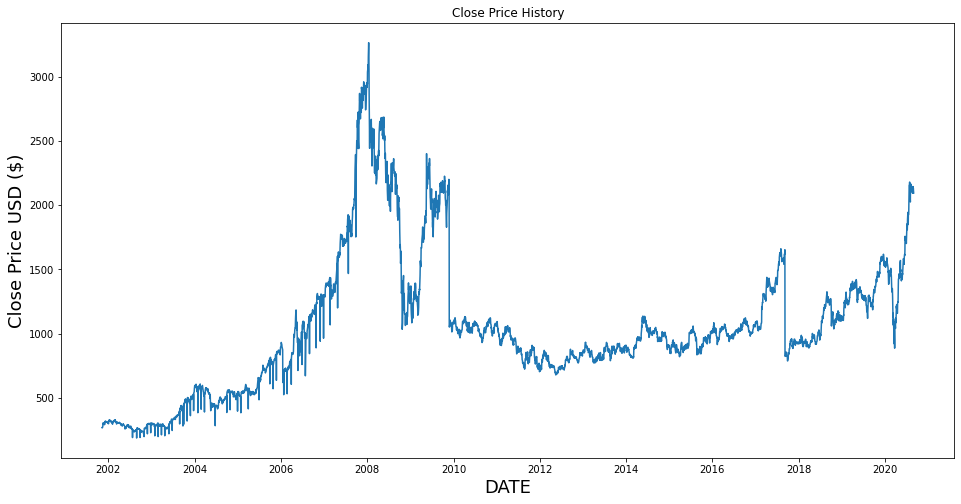

In [33]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df2['CLOSE'])
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
# Create a new dataframe with only the 'Close column 
data = df2.filter(['CLOSE'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))#remove decimal part

training_data_len

3708

In [35]:
len(dataset)

4635

In [36]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02621966],
       [0.02719377],
       [0.02654436],
       ...,
       [0.62648483],
       [0.63189653],
       [0.61977433]])

In [38]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.02621966, 0.02719377, 0.02654436, 0.02816787, 0.02930433,
       0.03855832, 0.03487837, 0.03514896, 0.03449955, 0.03449955,
       0.03704305, 0.03498661, 0.0340125 , 0.03385015, 0.03482426,
       0.03725952, 0.04213004, 0.04099359, 0.04213004, 0.04277945,
       0.04131829, 0.04131829, 0.04099359, 0.0403983 , 0.04034418,
       0.03969478, 0.04034418, 0.04034418, 0.04034418, 0.03904538,
       0.03742187, 0.03693482, 0.03953243, 0.03839597, 0.03790892,
       0.03612306, 0.0439159 , 0.0432665 , 0.04277945, 0.04586411,
       0.04570176, 0.04635116, 0.04586411, 0.04472766, 0.0439159 ,
       0.0435912 , 0.04115594, 0.04148064, 0.04148064, 0.04213004,
       0.04164299, 0.04213004, 0.04196769, 0.0426171 , 0.04164299,
       0.03920773, 0.03807127, 0.03839597, 0.03547366, 0.03498661])]
[0.040019482100819875]

[array([0.02621966, 0.02719377, 0.02654436, 0.02816787, 0.02930433,
       0.03855832, 0.03487837, 0.03514896, 0.03449955, 0.03449955,
       0.03704305, 0.03498661, 0.0

(3648, 60, 1)

In [39]:
x_train.shape[1]

60

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(30, return_sequences=True, 
               input_shape= (x_train.shape[1], 1)))
model.add(LSTM(15, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/10
57/57 [==============================] - 2s 41ms/step - loss: 0.0206
Epoch 2/10
57/57 [==============================] - 2s 41ms/step - loss: 0.0013
Epoch 3/10
57/57 [==============================] - 2s 41ms/step - loss: 0.0011
Epoch 4/10
57/57 [==============================] - 2s 41ms/step - loss: 9.4848e-04
Epoch 5/10
57/57 [==============================] - 2s 41ms/step - loss: 8.4057e-04
Epoch 6/10
57/57 [==============================] - 2s 42ms/step - loss: 7.2608e-04
Epoch 7/10
57/57 [==============================] - 2s 44ms/step - loss: 6.7100e-04
Epoch 8/10
57/57 [==============================] - 2s 41ms/step - loss: 6.7916e-04
Epoch 9/10
57/57 [==============================] - 2s 41ms/step - loss: 7.3654e-04
Epoch 10/10
57/57 [==============================] - 2s 41ms/step - loss: 6.3613e-04


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 30)            3840      
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2760      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 6,616
Trainable params: 6,616
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape

(927, 60, 1)

In [55]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

(927, 1)

In [58]:
predictions

array([[ 994.1283 ],
       [ 992.23413],
       [ 990.92017],
       [ 990.17706],
       [ 989.7612 ],
       [ 989.8052 ],
       [ 990.333  ],
       [ 991.1034 ],
       [ 992.1308 ],
       [ 993.2081 ],
       [ 995.12036],
       [ 997.8286 ],
       [1001.13007],
       [1005.0837 ],
       [1010.24384],
       [1015.79504],
       [1021.5167 ],
       [1027.5178 ],
       [1033.2351 ],
       [1038.832  ],
       [1043.6287 ],
       [1047.9369 ],
       [1051.2178 ],
       [1054.3268 ],
       [1056.5388 ],
       [1058.6742 ],
       [1061.4147 ],
       [1064.4915 ],
       [1067.8922 ],
       [1070.6132 ],
       [1073.1401 ],
       [1075.5233 ],
       [1077.5106 ],
       [1079.6981 ],
       [1081.7297 ],
       [1083.3837 ],
       [1085.26   ],
       [1086.494  ],
       [1085.6741 ],
       [1083.1527 ],
       [1079.5199 ],
       [1074.8069 ],
       [1069.0961 ],
       [1063.416  ],
       [1057.4153 ],
       [1051.8567 ],
       [1047.6299 ],
       [1044.

In [52]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse 

79.78666242869603

In [60]:
y_test.shape

(927, 1)

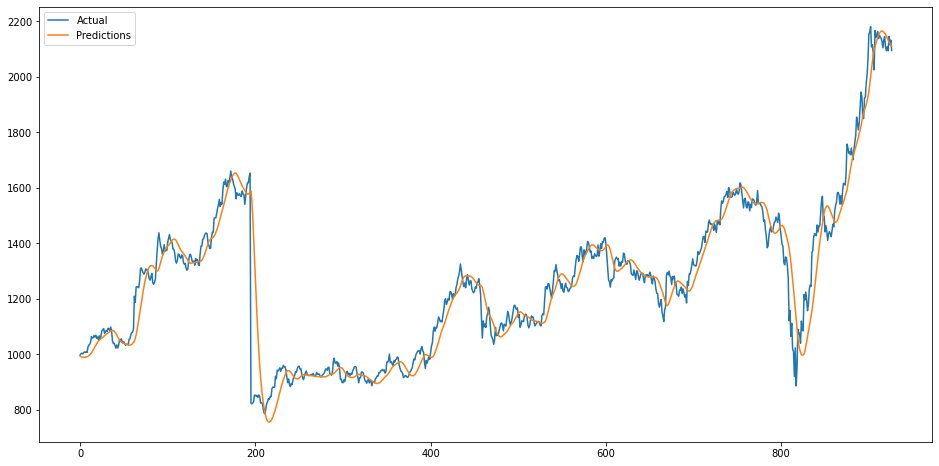

In [63]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predictions")
plt.legend()
plt.show()